# Task 2: Credit Risk Prediction

# **Objective:**

 Predict whether a loan applicant is likely to default on a loan.

# **Instructions**

● Handle missing data appropriately.

● Visualize key features such as loan amount, education, and income.

● Train a classification model like Logistic Regression or Decision Tree.

● Evaluate the model using accuracy and a confusion matrix

# **Dataset :**

**Loan Prediction Dataset**

This dataset contains 615 records and 13 features from the insurance and finance domain, aimed at predicting loan eligibility based on customer details. It represents a real-world classification problem to automate loan approval decisions and target eligible customer segments.

In [ ]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load dataset
df = pd.read_csv('/content/sample_data/train_u6lujuX_CVtuZ9i (1).csv')
df.shape


(614, 13)

In [ ]:
#columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#getting information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#check missing values
missing_values=df.isnull().sum()
print(missing_values)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
#handling missing values
#we will replace the "Nan" with most frequent value in categorica column
most_frequent_gender=df['Gender'].value_counts().idxmax()
df['Gender'].fillna(most_frequent_gender, inplace=True)

In [ ]:
#checking gender column
df['Gender'].isnull().sum()

np.int64(0)

In [ ]:
#handiling missing values in "Married " column
most_frequent_marriedValue=df['Married'].value_counts().idxmax()
df['Married'].fillna(most_frequent_marriedValue , inplace=True)
df['Married'].isnull().sum()

np.int64(0)

In [ ]:
#handling missing values in dependants columns
most_frequent_dependantValue=df['Dependents'].value_counts().idxmax()
df['Dependents'].fillna(most_frequent_dependantValue , inplace=True)
df['Dependents'].isnull().sum()

np.int64(0)

In [ ]:
#handling missing values in self_employed columns
most_frequent_self_employedValue=df['Self_Employed'].value_counts().idxmax()
df['Self_Employed'].fillna(most_frequent_self_employedValue , inplace=True)
df['Self_Employed'].isnull().sum()

np.int64(0)

In [ ]:
#handling missing values in "Loan_Amount_Term" column
most_frequent_loan_termValue=df['Loan_Amount_Term'].value_counts().idxmax()
df['Loan_Amount_Term'].fillna(most_frequent_loan_termValue , inplace=True)
df['Loan_Amount_Term'].isnull().sum()

/tmp/ipython-input-69310203.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(most_frequent_loan_termValue , inplace=True)


np.int64(0)

In [ ]:
#handling missing values in credit history column
most_frequent_credit_historyValue=df['Credit_History'].value_counts().idxmax()
df['Credit_History'].fillna(most_frequent_credit_historyValue , inplace=True)
df['Credit_History'].isnull().sum()

/tmp/ipython-input-3954215165.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(most_frequent_credit_historyValue , inplace=True)


np.int64(0)

In [ ]:
df['LoanAmount'].value_counts()

,count
LoanAmount,
120.0,20
110.0,17
100.0,15
187.0,12
160.0,12
...,...
292.0,1
142.0,1
350.0,1


In [ ]:
#handling missing values in loanAmount
mean_of_loanAmount=df['LoanAmount'].mean()
df['LoanAmount'].fillna(mean_of_loanAmount , inplace=True)
df['LoanAmount'].isnull().sum()


/tmp/ipython-input-1231805458.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(mean_of_loanAmount , inplace=True)


np.int64(0)

In [ ]:
#checking missing values in datset after handling missing values
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


## Step 2: Visualize Key Features

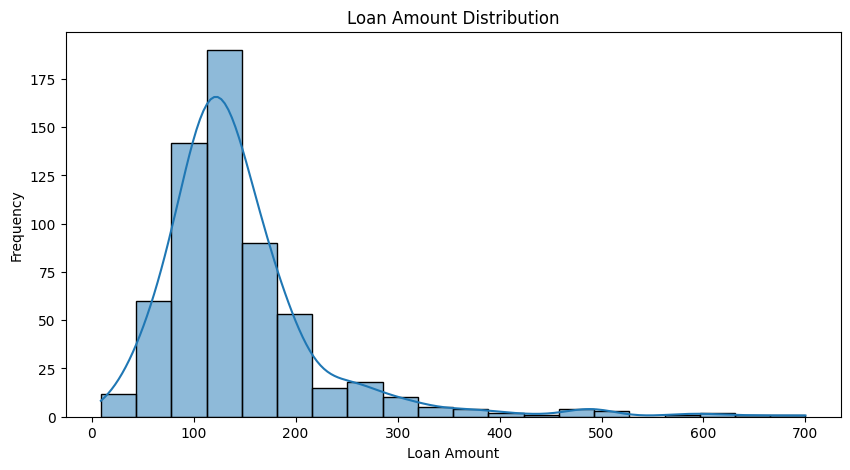

In [ ]:
#histogram for loan Amount
plt.figure(figsize=(10,5))
sns.histplot(df['LoanAmount'],bins=20,kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

Most loan applicants request a loan around 120–180 units, and very high loan amounts are uncommon.

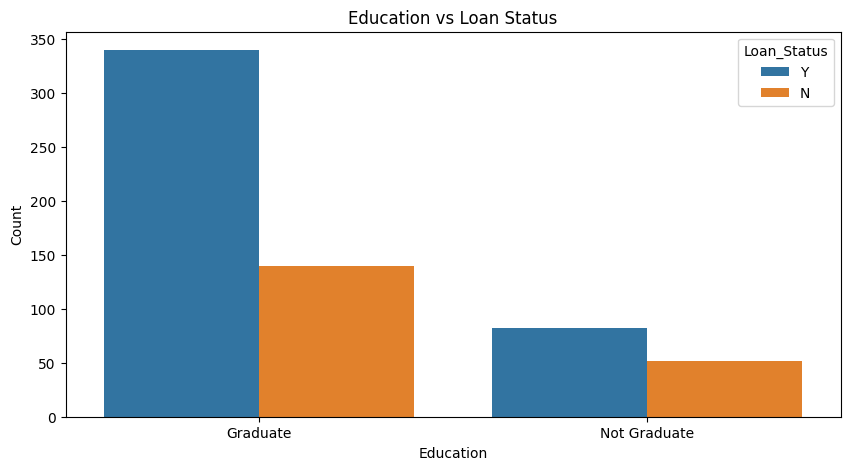

In [ ]:
#Education vs Loan Status
plt.figure(figsize=(10,5))
sns.countplot(x='Education',hue='Loan_Status',data=df)
plt.title('Education vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

Education appears to influence loan approval — graduates have a higher loan approval rate than non-graduates.

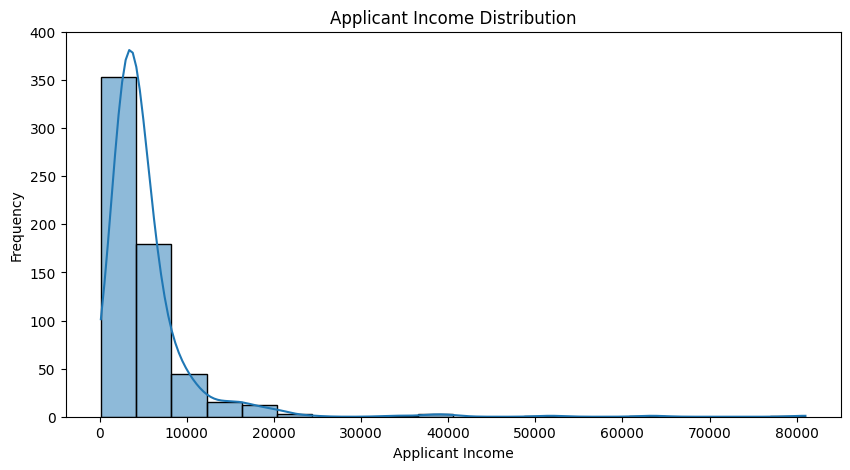

In [ ]:
#ApplicantIncome Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['ApplicantIncome'],bins=20,kde=True)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()


Most loan applicants earn less than 10,000, and very high incomes are uncommon in the dataset.

Text(0, 0.5, 'Loan Amount')

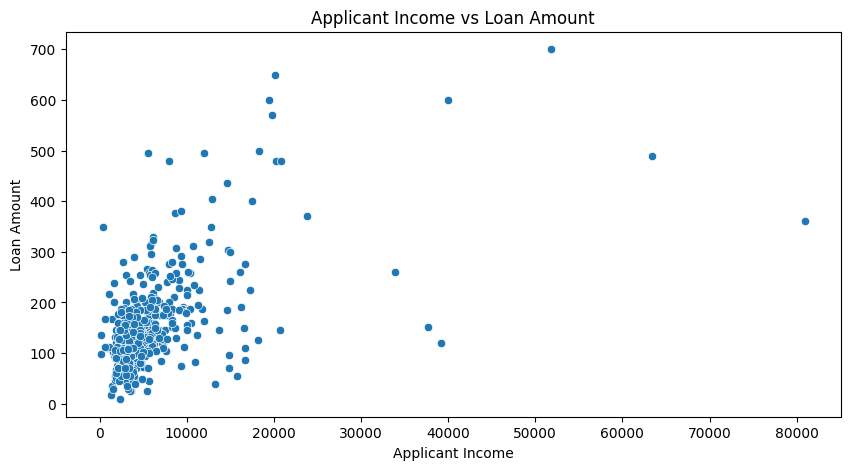

In [ ]:
#ApplicantIncome vs LoanAmount
plt.figure(figsize=(10,5))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=df)
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')

There is no clear linear relationship between applicant income and loan amount — having a higher income does not guarantee a larger loan request.

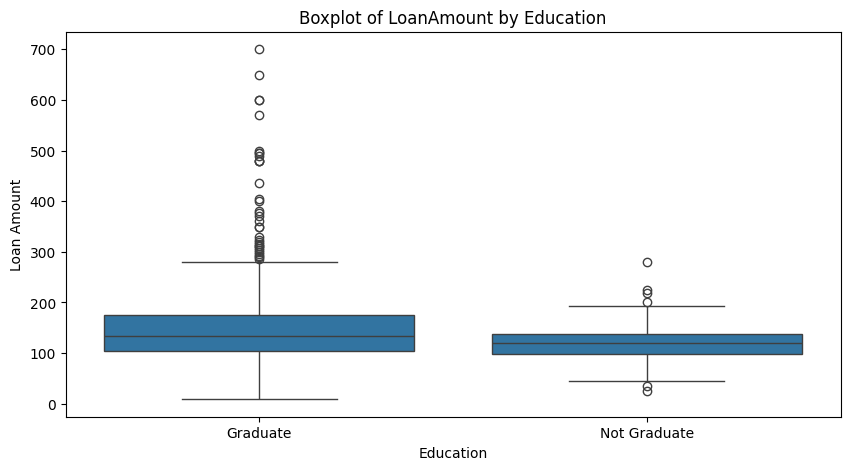

In [ ]:
#Boxplot of LoanAmount by Education
plt.figure(figsize=(10,5))
sns.boxplot(x='Education',y='LoanAmount',data=df)
plt.title('Boxplot of LoanAmount by Education')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show()

graduates tend to have higher and more varied loan amounts, including more outliers with very large loans. Conversely, non-graduates generally have lower and more consistent loan amounts.

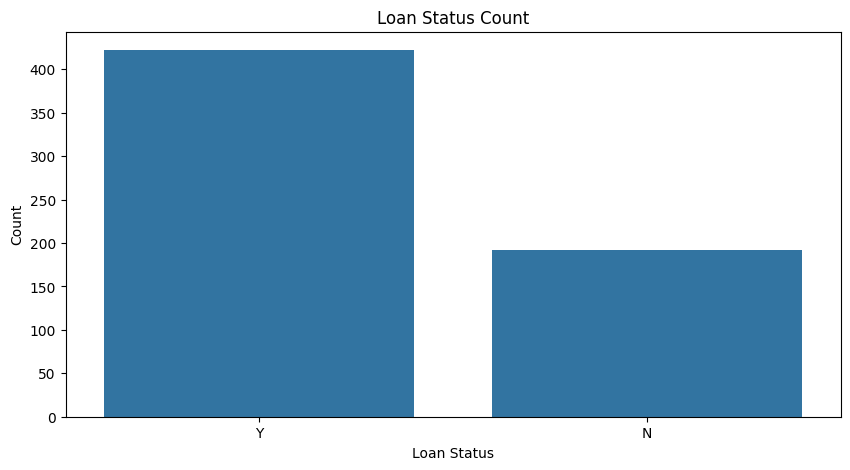

In [ ]:
#Loan_Status Count
plt.figure(figsize=(10,5))
sns.countplot(x='Loan_Status',data=df)
plt.title('Loan Status Count')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


it appears that roughly twice as many loans were approved compared to those that were not approved. The count for 'Y' is over 400, while the count for 'N' is under 200.

# Train a Classification Model

In [ ]:
#Label Encode the Target Variable
#Convert 'Y' and 'N' into 1 and 0.
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

In [ ]:
#Encode Categorical Features
df=pd.get_dummies(df,drop_first=True)

In [ ]:
#Split Data into Features and Target
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Train a Classification Model
#Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
#Make Predictions
y_pred = model.predict(X_test)

In [ ]:
#Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Optional: Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



# **Conclusion :**

The Logistic Regression model achieved an accuracy of 78.86%, performing exceptionally well in predicting class 1 (eligible for loan) with 99% recall, but showing weaker performance for class 0 (not eligible) with only 42% recall. This indicates the model is heavily biased toward predicting eligibility, which reduces its effectiveness in correctly identifying ineligible applicants.

In [ ]:
import joblib

# Save your model to a file
joblib.dump(model, 'loan_default_model.pkl')


['loan_default_model.pkl']